In [1]:
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *

In [2]:
SZ = 320
BS = 16
NUM_WORKERS = 12

In [3]:
data = ImageDataBunch.from_folder(
    path='/home/linus/cds_data/train/', 
    bs=BS, 
    valid_pct=0.2,
    num_workers=NUM_WORKERS,
    size=SZ, 
    resize_method=ResizeMethod.SQUISH,
    ds_tfms=(None, None)
)

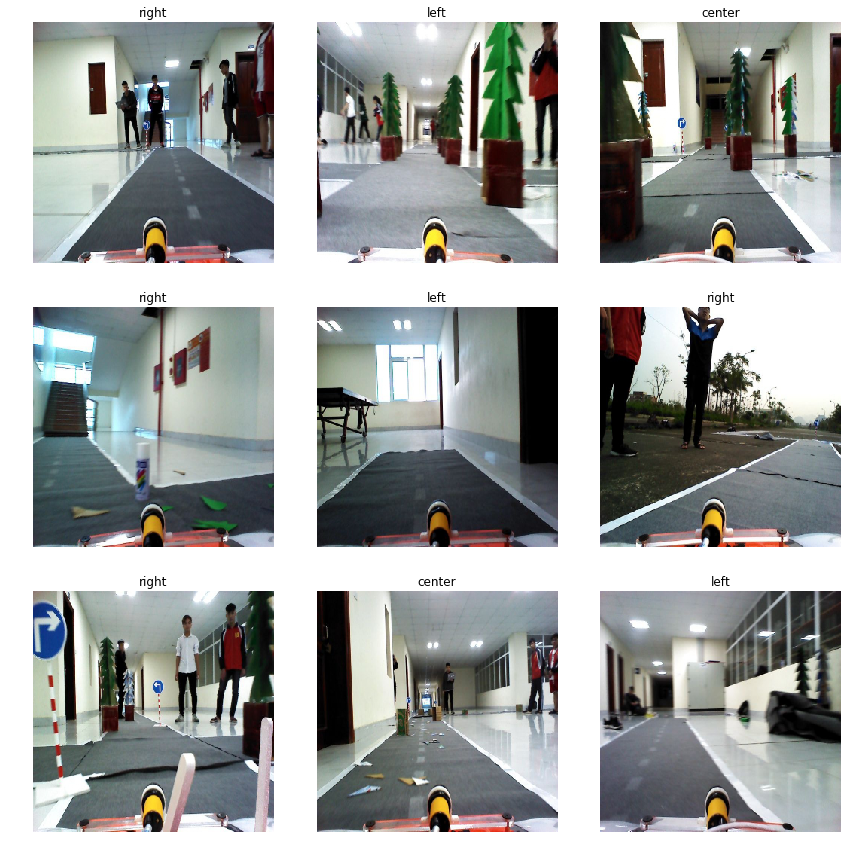

In [4]:
data.show_batch(rows=3)

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

In [6]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.368477,0.290076,0.886090,18:12
1,0.307150,0.241475,0.902593,18:08


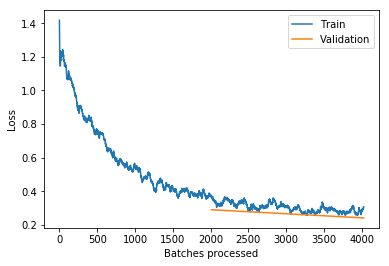

In [7]:
learn.recorder.plot_losses()

In [11]:
torch.cuda.empty_cache()

In [5]:
learn = load('/home/linus/model_notTrashCar/fast_ai/steer-model-resnet50-stage-1.pth')

NameError: name 'load' is not defined

In [12]:
# learn.save('/home/linus/model_notTrashCar/fast_ai/steer-model-resnet50-stage-1', with_opt=False)
# learn.unfreeze()
learn.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 1024.00 KiB (GPU 0; 3.95 GiB total capacity; 2.93 GiB already allocated; 10.69 MiB free; 26.49 MiB cached)

In [ ]:
learn.recorder.plot()

In [ ]:
max_lr = 1e-4
lrs = [max_lr/100, max_lr/10, max_lr]

In [ ]:
learn.fit_one_cycle(3, lrs)

In [ ]:
learn.save('/home/linus/model_notTrashCar/fast_ai/tfsign-resnet50-stage-2', with_opt=False)
learn.recorder.plot_losses()

In [ ]:
data_test = ImageDataBunch.from_folder(
    path='../traffic_sign_data/', 
    bs=BS, 
    num_workers=NUM_WORKERS,
    size=SZ, 
    resize_method=ResizeMethod.SQUISH,
    ds_tfms=(None, None)
)

In [ ]:
preds , y , losses = learn.predict(data_test, with_loss=True, is_test=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(slice_size=10)